In [1]:
from sklearn.datasets import load_iris
import pandas as pd

### Feature Selection 2

### Step 1 : Exhaustive Feature Selection 

In [2]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [16]:
lr = LogisticRegression(max_iter=200)
feature_sel = EFS(lr,max_features=4)

In [17]:
model = feature_sel.fit(df,iris.target)

Features: 15/15

In [18]:
model.best_score_

0.9733333333333334

In [23]:
model.best_feature_names_

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [25]:
# Formula for calculaing total feature subsets in EFS is :
# 2^n - 1 where n is max_features or feature that are being given to data
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal length (cm)',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': 0.5666666666666667,
  'feature_names': ('sepal width (cm)',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal length (cm)',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal width (cm)',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': 0.8133333333333332,
  'feature_names': ('sepal length (cm)', 'sepal width (cm)')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([

In [30]:
metric_df = pd.DataFrame(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472


In [31]:
from matplotlib import pyplot as plt

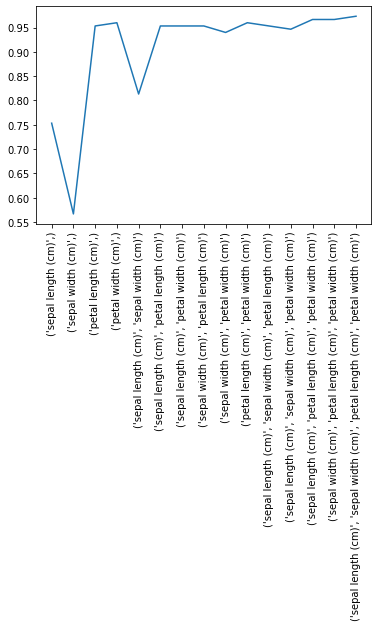

In [36]:
plt.plot([str(k) for k in metric_df['feature_names']], metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Using Regression dataset

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
from sklearn.model_selection import train_test_split

x = data.drop('medv',axis=1)
y = data['medv']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
y_test.shape

(102,)

In [44]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [46]:
x_train_scaled

array([[-0.37743861, -0.47456976, -0.5837312 , ...,  0.52359086,
         0.45391267, -0.83410575],
       [-0.38918729, -0.47456976, -0.78968387, ...,  0.33155209,
         0.45391267, -0.56340806],
       [-0.39619249,  3.16608882, -1.39883965, ..., -0.14854484,
        -0.13442027,  0.02927739],
       ...,
       [-0.3783975 , -0.47456976, -0.24869553, ...,  0.33155209,
         0.45391267, -0.10179728],
       [-0.3258116 , -0.47456976, -0.47350302, ...,  1.19572656,
         0.44029484, -0.6061498 ],
       [-0.13206441, -0.47456976,  1.18572129, ..., -1.82888409,
        -0.60795914, -0.23144722]])

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear = LinearRegression()

linear_model_training = cross_val_score(linear,X=x_train_scaled,y=y_train,scoring='r2',cv=10)
linear_model_testing = cross_val_score(linear,X=x_test_scaled,y=y_test,scoring='r2',cv=10)

In [69]:
linear_model_training.mean()

0.6883699418111653

In [70]:
linear_model_testing.mean()

0.598033358590819

#### Now applying linear regression again using EFS

In [73]:
efs = EFS(linear,max_features=13,print_progress=True,cv=10,scoring='r2')
fture_sel = efs.fit(x_train_scaled,y_train)

Features: 8191/8191

In [74]:
fture_sel.best_score_

0.6908017709038574

In [75]:
fture_sel.best_feature_names_

('0', '1', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [76]:
fture_sel.best_idx_

(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)

In [81]:
metric_data = pd.DataFrame(fture_sel.get_metric_dict()).T
metric_data.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.21114948846401937, 0.05617257789397889, 0.1...",0.090584,"(0,)",0.058456,0.078706,0.026235
1,"(1,)","[0.10024498418931094, 0.057415019085727104, -0...",0.08041,"(1,)",0.059363,0.079927,0.026642
2,"(2,)","[0.18401775043295243, 0.10274194717127505, 0.1...",0.18668,"(2,)",0.084623,0.113938,0.037979
3,"(3,)","[0.07730135125361781, 0.035964826531153404, -0...",0.027614,"(3,)",0.049668,0.066874,0.022291
4,"(4,)","[0.24448453708830642, 0.10867049515410976, 0.0...",0.139739,"(4,)",0.096446,0.129856,0.043285


In [96]:
def adjusted_r2(r2,num_features,total_data):
    coef = (total_data - 1) / (total_data - num_features - 1)
    return 1 - ((1 - r2) * coef)

In [97]:
metric_data['observations'] = 404
metric_data['num_features'] = metric_data['feature_idx'].apply(lambda x :len(x))
metric_data['adjusted_r2'] = adjusted_r2(metric_data['avg_score'],metric_data['num_features'],metric_data['observations'])

In [98]:
metric_data.tail()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6061158850048471, 0.7946197550981472, 0.656...",0.681429,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.078376,0.105526,0.035175,404,12,0.671652
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6101154304612251, 0.8103792767941538, 0.653...",0.688792,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.078139,0.105207,0.035069,404,12,0.679241
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6010802291159092, 0.7998841794119219, 0.648...",0.688205,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.075591,0.101777,0.033926,404,12,0.678636
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5912087277579527, 0.7985342060992906, 0.663...",0.682875,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.073551,0.09903,0.03301,404,12,0.673142
8190,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6098718561337806, 0.8100254843346093, 0.653...",0.68837,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.078202,0.105293,0.035098,404,13,0.677982


In [100]:
metric_data.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6074602842383303, 0.8005826789942025, 0.647...",0.690479,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.075194,0.101243,0.033748,404,10,0.682603
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6181802912059224, 0.8096041951792724, 0.652...",0.690802,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.078195,0.105283,0.035094,404,11,0.682125
8160,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6074758898705045, 0.7999812169543883, 0.648...",0.69011,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.075211,0.101265,0.033755,404,11,0.681414
8183,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.617975283389933, 0.809243898043696, 0.65274...",0.690373,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.078243,0.105348,0.035116,404,12,0.680871
8164,"(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6011462005712245, 0.8004653998340787, 0.647...",0.688572,"(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.075562,0.101738,0.033913,404,11,0.679833
...,...,...,...,...,...,...,...,...,...,...
0,"(0,)","[0.21114948846401937, 0.05617257789397889, 0.1...",0.090584,"(0,)",0.058456,0.078706,0.026235,404,1,0.088321
1,"(1,)","[0.10024498418931094, 0.057415019085727104, -0...",0.08041,"(1,)",0.059363,0.079927,0.026642,404,1,0.078122
30,"(1, 7)","[0.10039807747216667, 0.03616860718050863, -0....",0.070362,"(1, 7)",0.061171,0.082361,0.027454,404,2,0.065726
7,"(7,)","[0.09784323368776848, -0.0634713321307947, -0....",0.027929,"(7,)",0.068829,0.092673,0.030891,404,1,0.025511


In [101]:
x_train_sel = fture_sel.transform(x_train_scaled)
x_test_sel = fture_sel.transform(x_test_scaled)

In [104]:
import numpy as np
print(f'Training score for Linear Regression model using EFS: {np.mean(cross_val_score(linear,x_train_sel,y_train,scoring="r2"))}')
print(f'Testing score for Linear Regression model using EFS: {np.mean(cross_val_score(linear,x_test_sel,y_test,scoring="r2"))}')

Training score for Linear Regression model using EFS: 0.7064800467817652
Testing score for Linear Regression model using EFS: 0.6801687887814346


### We can clearly see that testing score has been increased almost 10 percent
- EFS is a lengthy and complex procedure thats why it must be used only if we have columns less than 15 as it check combination with each column have complexity (2^n -1) thats why we use other techniques  

### Step-2: Sequential Forward Elimination:

In [109]:
from sklearn.datasets import load_boston
boston = load_boston()

In [110]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [111]:
house = pd.DataFrame(boston.data,columns=boston.feature_names)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [112]:
house['medv'] = boston.target
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [113]:
from sklearn.model_selection import train_test_split

x = house.drop('medv',axis=1)
y = house['medv']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [115]:
x_test.shape

(102, 13)

In [116]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
x_train_scaled = scaled.fit_transform(x_train)
x_test_scaled = scaled.transform(x_test)

In [118]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [120]:
print(f'training: {np.mean(cross_val_score(lr,x_train_scaled,y_train,cv=5,scoring="r2"))}')
print(f'testing: {np.mean(cross_val_score(lr,x_test_scaled,y_test,cv=5,scoring="r2"))}')

training: 0.7050401205374819
testing: 0.688158464261728


In [125]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(lr,k_features='best',forward=True,scoring='r2')
sfs.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [131]:
sfs.k_feature_idx_

(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)

In [139]:
metric_df = pd.DataFrame(sfs.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.5105776182714135, 0.5582189701867164, 0.460...",0.5117,"(LSTAT,)",0.039979,0.031105,0.015552
2,"(5, 12)","[0.6273470340408479, 0.6196588940131581, 0.502...",0.595175,"(RM, LSTAT)",0.060292,0.046909,0.023454
3,"(5, 10, 12)","[0.650718904385023, 0.6551950158210169, 0.5461...",0.641876,"(RM, PTRATIO, LSTAT)",0.063392,0.049321,0.024661
4,"(5, 7, 10, 12)","[0.6639573070541647, 0.6745827090626894, 0.573...",0.658268,"(RM, DIS, PTRATIO, LSTAT)",0.055791,0.043407,0.021704
5,"(5, 7, 10, 11, 12)","[0.6821339028381262, 0.6931087344856537, 0.560...",0.672946,"(RM, DIS, PTRATIO, B, LSTAT)",0.075499,0.058741,0.029371
6,"(3, 5, 7, 10, 11, 12)","[0.6878675577193645, 0.6867884323038753, 0.565...",0.68145,"(CHAS, RM, DIS, PTRATIO, B, LSTAT)",0.080021,0.062259,0.031129
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7073779618588076, 0.7021952442859825, 0.560...",0.689103,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)",0.085153,0.066252,0.033126
8,"(3, 4, 5, 7, 8, 10, 11, 12)","[0.7136162055751426, 0.7103513247754756, 0.570...",0.695514,"(CHAS, NOX, RM, DIS, RAD, PTRATIO, B, LSTAT)",0.082191,0.063947,0.031974
9,"(3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7225293092511473, 0.713513532737698, 0.5840...",0.70096,"(CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT)",0.07669,0.059667,0.029834
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7332217561791099, 0.7082579836450691, 0.575...",0.704533,"(CRIM, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, ...",0.087209,0.067851,0.033926


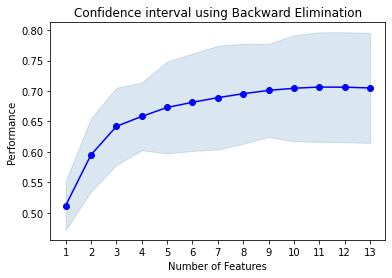

In [154]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict(),kind='ci') # we can print it for 'std_err' too.
plt.title('Confidence interval using Backward Elimination')
plt.show()

In [155]:
x_train_trans = sfs.transform(x_train_scaled)
x_test_trans = sfs.transform(x_test_scaled)

In [157]:
print(f'training: {np.mean(cross_val_score(lr,x_train_trans,y_train,cv=5,scoring="r2"))}')
print(f'testing: {np.mean(cross_val_score(lr,x_test_trans,y_test,cv=5,scoring="r2"))}')

training: 0.7064800467817652
testing: 0.6801687887814346


### Using Backward Elimination approach

In [164]:
bfs = SFS(lr,k_features='best',forward=False,cv=5,scoring='r2')
x_train_trans_by_bfs = bfs.fit_transform(x_train_scaled,y_train)
x_test_trans_by_bfs = bfs.transform(x_test_scaled)

In [165]:
np.mean(cross_val_score(lr,x_train_trans_by_bfs,y_train,cv=5,scoring='r2'))

0.7064800467817652

In [166]:
np.mean(cross_val_score(lr,x_test_trans_by_bfs,y_test,cv=5,scoring='r2'))

0.6801687887814346

### Although using backward or forward elimination approach our result drop a bit but its way better than not using any feature selection technique however its 
- Result is a bit bad then ExhaustiveFeatureSelector but forward and backward feature selection time complexity is much less than exhaustive which takes a long time to training on data